In [23]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import matplotlib
import scipy
import numpy as np
import seaborn as sns

In [24]:
CVD = pd.read_csv(r"https://covid.ourworldindata.org/data/ecdc/full_data.csv")

In [25]:
CVD.columns

Index(['date', 'location', 'new_cases', 'new_deaths', 'total_cases',
       'total_deaths', 'weekly_cases', 'weekly_deaths', 'biweekly_cases',
       'biweekly_deaths'],
      dtype='object')

In [26]:
CVD['date'] = [dt.datetime.strptime(x,'%Y-%m-%d') for x in CVD['date']] 

In [27]:
CVD = CVD.drop(['weekly_cases', 'weekly_deaths', 'biweekly_cases','biweekly_deaths'], axis=1)

In [28]:
CVD.columns = ['Date', 'Country', 'New Cases', 'New deaths', 'Total Cases', 'Total Deaths' ]

In [29]:
CVD_no_china = CVD.loc[~(CVD['Country'].isin(["China", "World"]))]

In [30]:
CVD_no_china = pd.DataFrame(CVD_no_china.groupby(['Country', 'Date'])['Total Cases', 'Total Deaths'].sum()).reset_index()

c:\users\mrkoh\pycharmprojects\untitled1\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [63]:
CVD_no_china.head()

,Country,Date,Total Cases,Total Deaths
34627,Zimbabwe,2020-08-06,4339.0,84.0
34626,Zimbabwe,2020-08-05,4221.0,81.0
34625,Zimbabwe,2020-08-04,4075.0,80.0
34624,Zimbabwe,2020-08-03,3921.0,70.0
34623,Zimbabwe,2020-08-02,3659.0,69.0


In [31]:
CVD_no_china = CVD_no_china.sort_values(by = ['Country','Date'], ascending=False)

In [76]:
def plot_exponential_fit_data_TC(d_df, title, delta):
    d_df = d_df.sort_values(by=['Date'], ascending=True)
    d_df['x'] = np.arange(len(d_df)) + 1  #Add column x to the dataframe 
    d_df['y'] = d_df['Total Cases']   #Add column y to the dataframe 
    x = d_df['x'][:-delta]  #Remove delta number of data points (so we can predict them)
    y = d_df['y'][:-delta]  #Remove delta number of data points (so we can predict them)
    c2 = scipy.optimize.curve_fit(lambda t, a, b: a*np.exp(b*t),  x,  y,  p0=(20, 0.2)) 
    A, B = c2[0]  #Coefficients
    print(f'(y = Ae^(Bx)) A: {A}, B: {B}\n')
    x = range(1,d_df.shape[0] + 1)
    y_fit = A * np.exp(B * x)
    f, ax = plt.subplots(1,1, figsize=(12,6))
    g = sns.scatterplot(x=d_df['x'][:-delta], y=d_df['y'][:-delta], label='Confirmed cases (used for model creation)', color='red')
    g = sns.scatterplot(x=d_df['x'][-delta:], y=d_df['y'][-delta:], label='Confirmed cases (not used for model, validation)', color='blue')
    g = sns.lineplot(x=x, y=y_fit, label='Predicted values', color='green')  #Predicted
    x_future=range(195,200)  
    y_future=A * np.exp(B * x_future)
    print("Expected cases for the next 5 days: \n", y_future)
    plt.xlabel('Days since first case')
    plt.ylabel(f'Total cases')
    plt.title(f'Confirmed cases & projected cases: {title}')
    plt.xticks(rotation=90)
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()

(y = Ae^(Bx)) A: 7990.349463708028, B: 0.013578391596963078

Expected cases for the next 5 days: 
 [112845.63895105 114388.35130017 115952.15406461 117537.33557135
 119144.18808913]


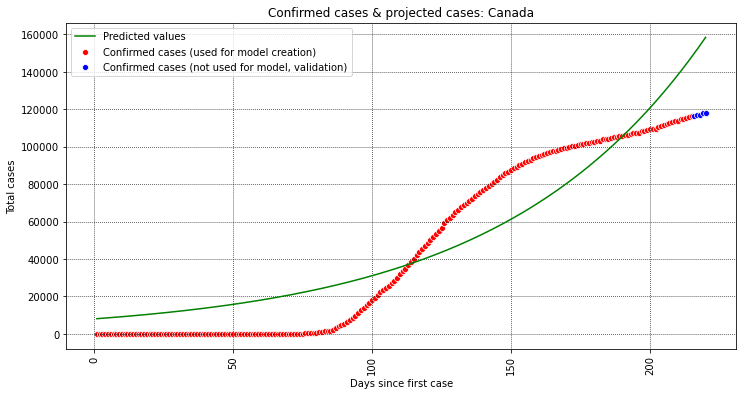

In [77]:
CVD_Canada = CVD_no_china[CVD_no_china['Country']=='Canada']

d_df = CVD_Canada.copy()
plot_exponential_fit_data_TC(d_df, 'Canada', 5)

In [59]:
CVD.columns

Index(['Date', 'Country', 'New Cases', 'New deaths', 'Total Cases',
       'Total Deaths'],
      dtype='object')

In [79]:
def plot_exponential_fit_data_TD(d_df, title, delta):
    d_df = d_df.sort_values(by=['Date'], ascending=True)
    
    d_df['x'] = np.arange(len(d_df)) + 1  #Add column x to the dataframe 
    d_df['y'] = d_df['Total Deaths']   #Add column y to the dataframe 
    
    x = d_df['x'][:-delta]  #Remove delta number of data points (so we can predict them)
    y = d_df['y'][:-delta]  #Remove delta number of data points (so we can predict them)
   
    c2 = scipy.optimize.curve_fit(lambda t, a, b: a*np.exp(b*t),  x,  y,  p0=(20, 0.2)) 
    
    A, B = c2[0]  #Coefficients
    print(f'(y = Ae^(Bx)) A: {A}, B: {B}\n')
    
    x = range(1,d_df.shape[0] + 1)
    y_fit = A * np.exp(B * x)
    
    f, ax = plt.subplots(1,1, figsize=(12,6))
    
    g = sns.scatterplot(x=d_df['x'][:-delta], y=d_df['y'][:-delta], label='Confirmed cases (used for model creation)', color='red')
    g = sns.scatterplot(x=d_df['x'][-delta:], y=d_df['y'][-delta:], label='Confirmed cases (not used for model, validation)', color='blue')
    g = sns.lineplot(x=x, y=y_fit, label='Predicted values', color='green')  #Predicted
    
    x_future=range(85,90)  
    y_future=A * np.exp(B * x_future)
    print("Expected cases for the next 5 days: \n", y_future)
    
    plt.xlabel('Days since first case')
    plt.ylabel(f'Total Deaths')
    plt.title(f'Confirmed Deaths & projected cases: {title}')
    plt.xticks(rotation=90)
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()

(y = Ae^(Bx)) A: 9.264340489718567e-15, B: 0.1999999896388583

Expected cases for the next 5 days: 
 [2.23779510e-07 2.73324908e-07 3.33839793e-07 4.07752839e-07
 4.98030437e-07]


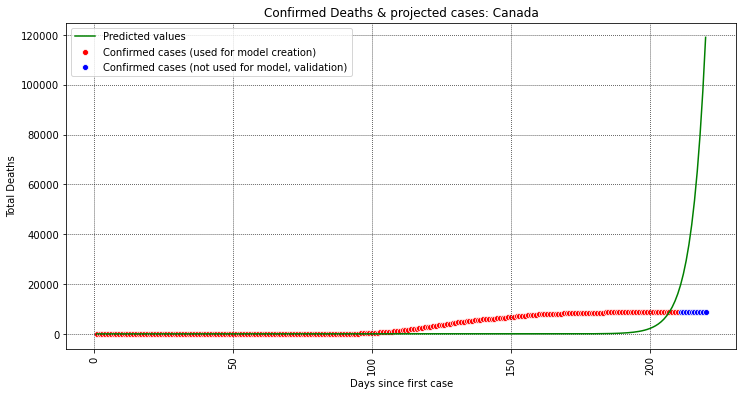

In [80]:
CVD_Canada = CVD_no_china[CVD_no_china['Country']=='Canada']

d_df = CVD_Canada.copy()
plot_exponential_fit_data_TD(d_df, 'Canada', 10)